<a href="https://colab.research.google.com/github/harry-kaye/testproject1/blob/main/alternative_weather_forecast_project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter City: haifa
Enter Country (use 2-letter ISO code): il
API key: 057993c09073fc92c6608e0e36159f4e

5-day Forecast:
                        Forecast Time  Temperature (°C)       Description  \
0      Friday, 14 June 2024, 12:00 PM             29.90         clear sky   
1      Friday, 14 June 2024, 03:00 PM             29.52         clear sky   
2      Friday, 14 June 2024, 06:00 PM             28.82         clear sky   
3      Friday, 14 June 2024, 09:00 PM             27.06         clear sky   
4    Saturday, 15 June 2024, 12:00 AM             26.87         clear sky   
5    Saturday, 15 June 2024, 03:00 AM             26.56         clear sky   
6    Saturday, 15 June 2024, 06:00 AM             26.59         clear sky   
7    Saturday, 15 June 2024, 09:00 AM             29.93         clear sky   
8    Saturday, 15 June 2024, 12:00 PM             30.88         clear sky   
9    Saturday, 15 June 2024, 03:00 PM             31.30         clear sky   
10   Saturday, 15 June 2024, 06:00

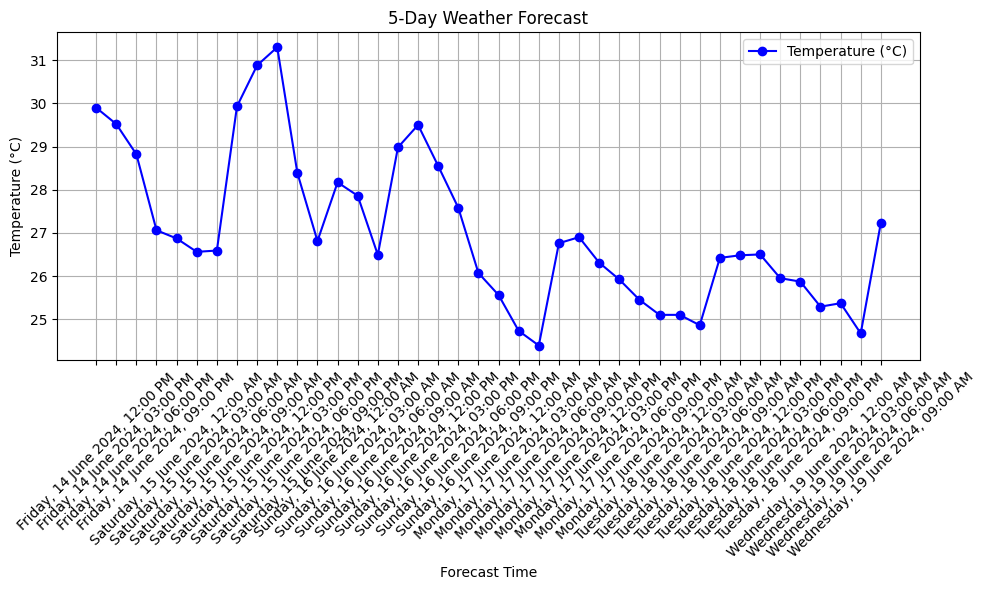

In [4]:
import requests
from datetime import datetime, timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt

def show_country_codes():
    country_codes = {
        "Afghanistan": "AF", "Albania": "AL", "Algeria": "DZ", "Andorra": "AD",
        "Angola": "AO", "Antigua and Barbuda": "AG", "Argentina": "AR", "Armenia": "AM",
        "Australia": "AU", "Austria": "AT", "Azerbaijan": "AZ", "Bahamas": "BS",
        "Bahrain": "BH", "Bangladesh": "BD", "Barbados": "BB", "Belarus": "BY",
        "Belgium": "BE", "Belize": "BZ", "Benin": "BJ", "Bhutan": "BT",
        "Bolivia": "BO", "Bosnia and Herzegovina": "BA", "Botswana": "BW", "Brazil": "BR",
        "Brunei": "BN", "Bulgaria": "BG", "Burkina Faso": "BF", "Burundi": "BI",
        "Cabo Verde": "CV", "Cambodia": "KH", "Cameroon": "CM", "Canada": "CA",
        "Central African Republic": "CF", "Chad": "TD", "Chile": "CL", "China": "CN",
        "Colombia": "CO", "Comoros": "KM", "Congo": "CG", "Costa Rica": "CR",
        "Croatia": "HR", "Cuba": "CU", "Cyprus": "CY", "Czech Republic": "CZ",
        "Denmark": "DK", "Djibouti": "DJ", "Dominica": "DM", "Dominican Republic": "DO",
        "Ecuador": "EC", "Egypt": "EG", "El Salvador": "SV", "Equatorial Guinea": "GQ",
        "Eritrea": "ER", "Estonia": "EE", "Eswatini": "SZ", "Ethiopia": "ET",
        "Fiji": "FJ", "Finland": "FI", "France": "FR", "Gabon": "GA",
        "Gambia": "GM", "Georgia": "GE", "Germany": "DE", "Ghana": "GH",
        "Greece": "GR", "Grenada": "GD", "Guatemala": "GT", "Guinea": "GN",
        "Guinea-Bissau": "GW", "Guyana": "GY", "Haiti": "HT", "Honduras": "HN",
        "Hungary": "HU", "Iceland": "IS", "India": "IN", "Indonesia": "ID",
        "Iran": "IR", "Iraq": "IQ", "Ireland": "IE", "Israel": "IL",
        "Italy": "IT", "Jamaica": "JM", "Japan": "JP", "Jordan": "JO",
        "Kazakhstan": "KZ", "Kenya": "KE", "Kiribati": "KI", "Kuwait": "KW",
        "Kyrgyzstan": "KG", "Laos": "LA", "Latvia": "LV", "Lebanon": "LB",
        "Lesotho": "LS", "Liberia": "LR", "Libya": "LY", "Liechtenstein": "LI",
        "Lithuania": "LT", "Luxembourg": "LU", "Madagascar": "MG", "Malawi": "MW",
        "Malaysia": "MY", "Maldives": "MV", "Mali": "ML", "Malta": "MT",
        "Marshall Islands": "MH", "Mauritania": "MR", "Mauritius": "MU", "Mexico": "MX",
        "Micronesia": "FM", "Moldova": "MD", "Monaco": "MC", "Mongolia": "MN",
        "Montenegro": "ME", "Morocco": "MA", "Mozambique": "MZ", "Myanmar": "MM",
        "Namibia": "NA", "Nauru": "NR", "Nepal": "NP", "Netherlands": "NL",
        "New Zealand": "NZ", "Nicaragua": "NI", "Niger": "NE", "Nigeria": "NG",
        "North Korea": "KP", "North Macedonia": "MK", "Norway": "NO", "Oman": "OM",
        "Pakistan": "PK", "Palau": "PW", "Panama": "PA", "Papua New Guinea": "PG",
        "Paraguay": "PY", "Peru": "PE", "Philippines": "PH", "Poland": "PL",
        "Portugal": "PT", "Qatar": "QA", "Romania": "RO", "Russia": "RU",
        "Rwanda": "RW", "Saint Kitts and Nevis": "KN", "Saint Lucia": "LC", "Saint Vincent and the Grenadines": "VC",
        "Samoa": "WS", "San Marino": "SM", "Sao Tome and Principe": "ST", "Saudi Arabia": "SA",
        "Senegal": "SN", "Serbia": "RS", "Seychelles": "SC", "Sierra Leone": "SL",
        "Singapore": "SG", "Slovakia": "SK", "Slovenia": "SI", "Solomon Islands": "SB",
        "Somalia": "SO", "South Africa": "ZA", "South Korea": "KR", "South Sudan": "SS",
        "Spain": "ES", "Sri Lanka": "LK", "Sudan": "SD", "Suriname": "SR",
        "Sweden": "SE", "Switzerland": "CH", "Syria": "SY", "Taiwan": "TW",
        "Tajikistan": "TJ", "Tanzania": "TZ", "Thailand": "TH", "Timor-Leste": "TL",
        "Togo": "TG", "Tonga": "TO", "Trinidad and Tobago": "TT", "Tunisia": "TN",
        "Turkey": "TR", "Turkmenistan": "TM", "Tuvalu": "TV", "Uganda": "UG",
        "Ukraine": "UA", "United Arab Emirates": "AE", "United Kingdom": "GB", "United States": "US",
        "Uruguay": "UY", "Uzbekistan": "UZ", "Vanuatu": "VU", "Vatican City": "VA",
        "Venezuela": "VE", "Vietnam": "VN", "Yemen": "YE", "Zambia": "ZM", "Zimbabwe": "ZW"
    }

    message = "\n".join([f"{country}: {code}" for country, code in country_codes.items()])
    try:
        root = tk.Tk()
        root.withdraw()  # Hide the main window
        messagebox.showinfo("Country Codes", message)
    except tk.TclError:
        print("Unable to open a Tkinter window. Here are the country codes:")
        print(message)

def get_local_time(timezone_offset):
    utc_time = datetime.now(timezone.utc)
    local_time = utc_time + timedelta(seconds=timezone_offset)
    return local_time.strftime("%A, %d %B %Y, %I:%M %p")

def get_forecast_data(city, country, state, api_key):
    location_query = f"{city},{country}"
    if state:
        location_query = f"{city},{state},{country}"

    url = f"http://api.openweathermap.org/data/2.5/forecast?q={location_query}&appid={api_key}&units=metric"
    res = requests.get(url)
    data = res.json()

    if res.status_code == 200:
        forecast_data = []
        for forecast in data['list']:
            forecast_time = datetime.fromtimestamp(forecast['dt'], timezone.utc) + timedelta(seconds=data['city']['timezone'])
            temp = forecast['main']['temp']
            description = forecast['weather'][0]['description']
            wind = forecast['wind']['speed']
            humidity = forecast['main']['humidity']
            pressure = forecast['main']['pressure']
            forecast_data.append({
                'Forecast Time': forecast_time.strftime("%A, %d %B %Y, %I:%M %p"),
                'Temperature (°C)': temp,
                'Description': description,
                'Wind Speed (m/s)': wind,
                'Humidity (%)': humidity,
                'Pressure (hPa)': pressure
            })
        return forecast_data
    else:
        return None

# Show the country codes popup or print them if Tkinter cannot open
# show_country_codes()

city = input("Enter City: ")
country = input("Enter Country (use 2-letter ISO code): ").upper()
state = ""

if country == "US":
    state = input("Enter State (if applicable): ")

api_key = input("API key: ")

location_query = f"{city},{country}"

if state:
    location_query = f"{city},{state},{country}"

# 5-day forecast data
forecast_data = get_forecast_data(city, country, state, api_key)
if forecast_data:
    df = pd.DataFrame(forecast_data)
    print("\n5-day Forecast:")
    print(df)
else:
    print("Unable to fetch forecast data.")

    # 5-day forecast data
forecast_data = get_forecast_data(city, country, state, api_key)
if forecast_data:
    df = pd.DataFrame(forecast_data)

    # Plotting the Temperature over Time
    plt.figure(figsize=(10, 6))
    plt.plot(df['Forecast Time'], df['Temperature (°C)'], marker='o', linestyle='-', color='b', label='Temperature (°C)')
    plt.title('5-Day Weather Forecast')
    plt.xlabel('Forecast Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Unable to fetch forecast data.")